In [ ]:
!pip install comet_ml

In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="vsNTC2o8UVKvzgsD124nWXkbt",
    project_name="V5 classification-predict-team-4",
    workspace="beebeefaith",
) 

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/beebeefaith/v5-classification-predict-team-4/4693757aca774f2fb7d55db89b80dad4



# Climate Change Belief Analysis 2022


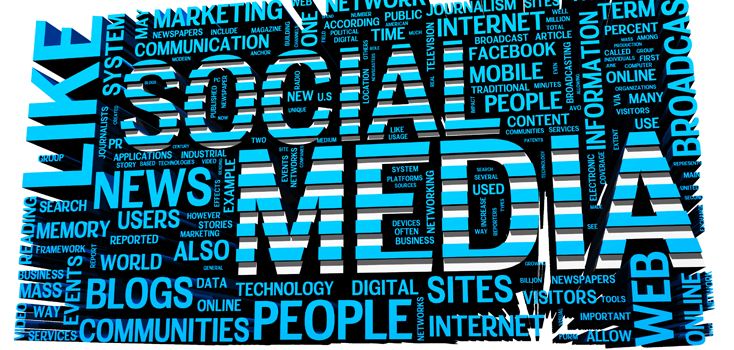

### About the problem

Many companies are built around lessening one’s environmental impact or carbon footprint. They     offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.
                
### The Objective

Create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.


Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


                
   
                
                
            


- What is the goal of this? (i.e classify twitter posts as either neutral, factual, etc...)
- Breakdown of the notebook (i.e where you got the data? cleaning it, organizing it, etc)
- What limitations did you face in achieving this?

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



In [7]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/92/f2/c48787ca7d1e20daa185e1b6b2d4e16acd2fb5e0320bc50ffc89b91fa4d7/importlib_metadata-4.11.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/19/99/ace1769546388976b45e93445bb04c6df95e96363f03fbb56f916da5ebde/cachetools-5.0.0-py3-none-any.whl
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4835 sha256=d3665f721e8888ecaeaee7ace025c619ab3d25339282d3e39baecd14d0ab886e
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\user\\anaconda3\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
#pip install xgboost

In [28]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
import string

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem import PorterStemmer

# Libraries for model building
#import tensorflow
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

# Libraries for data preprocessing and model performance
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer, ENGLISH_STOP_WORDS
from sklearn.metrics import confusion_matrix, f1_score,classification_report, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample





<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- Brief summary of where the data is from.

In [29]:
# Let us import our test, train and submission data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
samplesubmission = pd.read_csv('sample_submission.csv')

print(train.shape)
print(test.shape)
print(samplesubmission.shape)

(15819, 3)
(10546, 2)
(10546, 2)


From the print above, we have 3 features to work with....
Next, let us get a better view at the content.

In [30]:
train.head(3)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562


In [31]:
test.head(3)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

EDA is Exploratory is a robust technique for familiarising yourself with the Data and extracting useful insights.

EDA is important because besides getting the basic insights and general understanding of our data, we can set the procedure and steps to follow on the entire modelling course.


In [32]:
# Check for null values

train.isnull().any()
test.isnull().any()

message    False
tweetid    False
dtype: bool

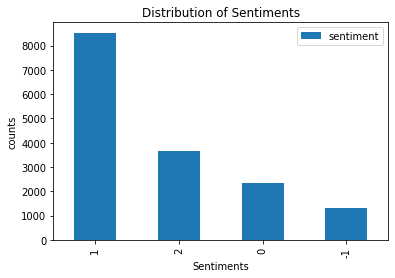

In [33]:
#Lets take a look at the breakdown of sentiments (target variable)

pd.value_counts(train['sentiment']).plot.bar()
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('counts')
plt.legend()
plt.show()

######  --Observations--

We can see from the graph above that our sentiments are imbalanced and multiclass.
This might have some impact in the model building. 
We will work on balancing the data later

In [34]:
# Get actual count and statistics of the target variable
train.shape


(15819, 3)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

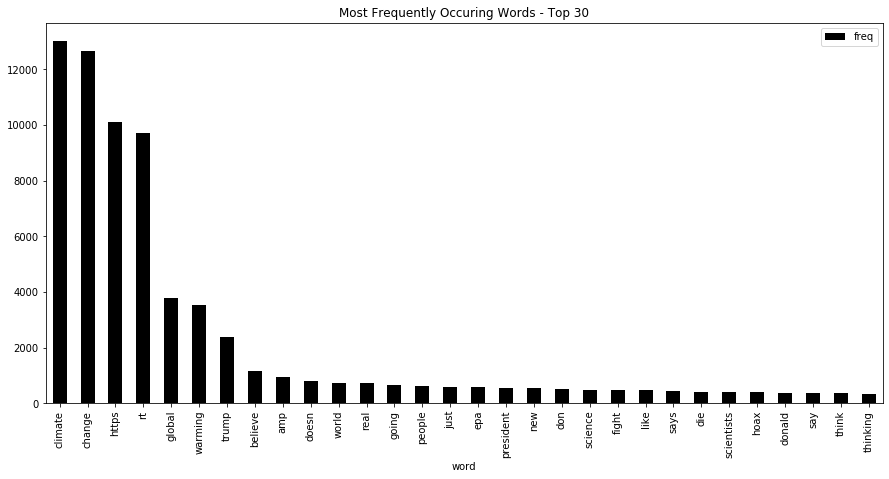

In [35]:
# Lets take a look at the most occuring words in our train dataset


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.message)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'black')
plt.title("Most Frequently Occuring Words - Top 30")

###### Observation
From the graph above, The 6 most frequent words are (climate, change, https, rt, global, warming )

##### Let take a deeper view by building wordclouds for all the different sentiments in our dataset

Text(0.5, 1.0, 'WordCloud - Vocabulary from General Tweets')

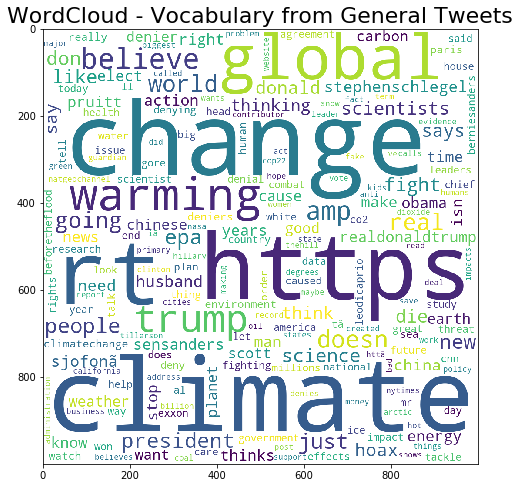

In [36]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from General Tweets", fontsize = 22)

#### From the General Tweets we see that the prominent words are: Climate,change, warming, global, people, president in that descending order

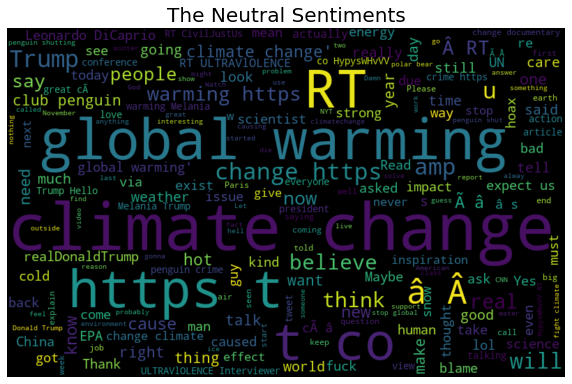

In [37]:
neutral_words =' '.join([text for text in train['message'][train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Sentiments', fontsize = 20)
plt.show()

From the Neutral Sentiments, we see that 'global warming', 'climate change' are prominent, but 'https','rt','co' though they seem important are part of noise collected while scrapping the data. After cleaning the data they should not be part of the document.

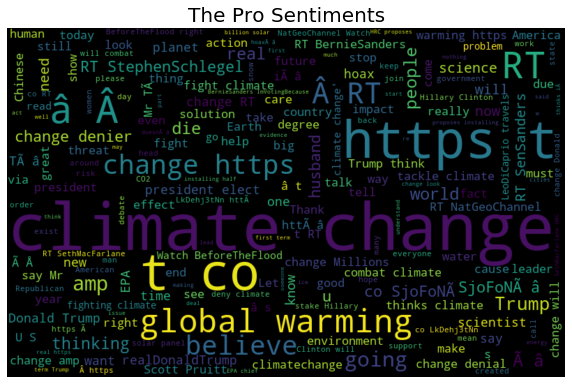

In [38]:
pro_words =' '.join([text for text in train['message'][train['sentiment'] == 1]])

wordcloud = WordCloud( width=800, height=500, random_state = 0, max_font_size = 110).generate(pro_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Pro Sentiments', fontsize = 20)
plt.show()

From the Pro Sentiments, again we see that 'global warming', 'climate change' are prominent, but 'https','rt','co' though they seem important are part of noise collected while scrapping the data. After cleaning the data they should not be part of the document.

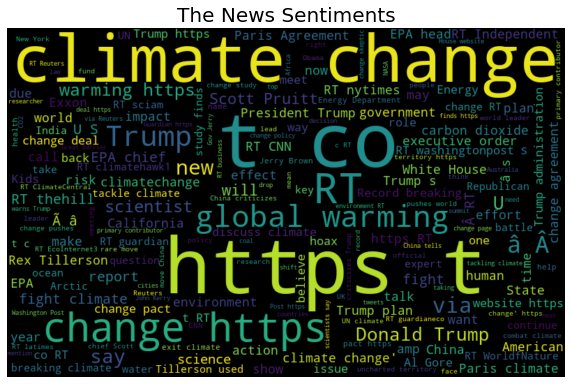

In [39]:
news_words =' '.join([text for text in train['message'][train['sentiment'] == 2]])

wordcloud = WordCloud( width=800, height=500, random_state = 0, max_font_size = 110).generate(news_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The News Sentiments', fontsize = 20)
plt.show()

From the News Sentiments, again we see that 'global warming', 'climate change' are prominent, ,'change' and 'Trump' are also at the top but 'https','rt','co' though they seem important are part of noise collected while scrapping the data. After cleaning the data they should not be part of the document. From this we also learn that the data was collected from the USA, from the mentions of 'Donald Trump','Al Gore', 'White house' we can also tell that the data might also have been collected during Trump's presidency, that is between 2016-2020

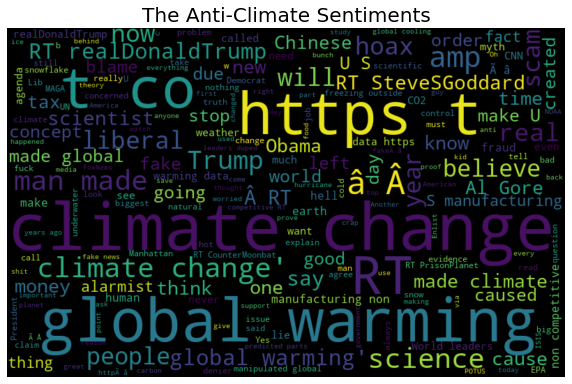

In [40]:
anti_words =' '.join([text for text in train['message'][train['sentiment'] == -1]])

wordcloud = WordCloud( width=800, height=500, random_state = 0, max_font_size = 110).generate(anti_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Anti-Climate Sentiments', fontsize = 20)
plt.show()

From the Anti-climate Sentiments, again we see that 'global warming', 'climate change' are prominent, ,'science','Donald Trump','science','man made' and 'Trump' are also at the top but 'https','rt','co' though they seem important are part of noise collected while scrapping the data. After cleaning the data they should not be part of the document.

#### Observation
###### Across the sentiments, "Climate,Change, Global, Warming" seems to be the most commonly used words. Though the data had no timestamp nor geographical status, from the Wordcloud Analysis we have been able to learn that the data was most probably collected from the USA and the most probable time period would have been during Donald Trump's Presidency, that is between 2016-2020

In [41]:
# Next, lets take a look at our hashtags

def hashtag_extract(x):
    hashtags = []    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [42]:
# extracting hashtags from News tweets
HT_News = hashtag_extract(train['message'][train['sentiment'] == 2])

# extracting hashtags from Pro tweets
HT_Pro = hashtag_extract(train['message'][train['sentiment'] == 1])

# extracting hashtags from neutral tweets
HT_Neutral = hashtag_extract(train['message'][train['sentiment'] == 0])

# extracting hashtags from anti-climate tweets
HT_Anti = hashtag_extract(train['message'][train['sentiment'] == -1])

# unnesting list
HT_News = sum(HT_News,[])
HT_Pro = sum(HT_Pro,[])
HT_Neutral = sum(HT_Neutral,[])
HT_Anti = sum(HT_Anti,[])

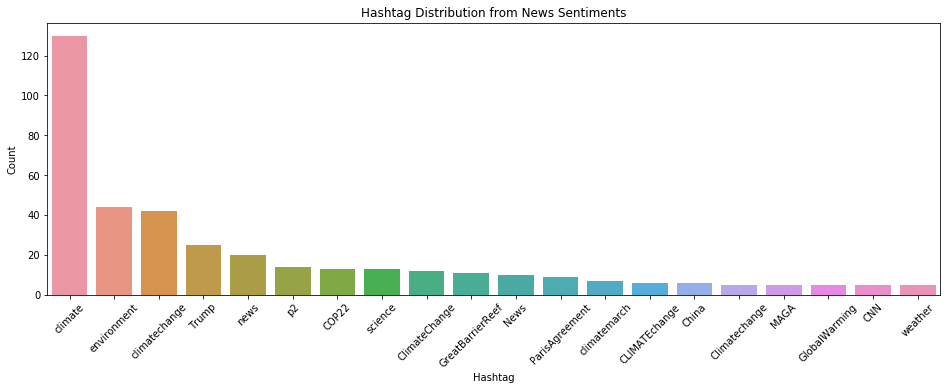

In [43]:
a = nltk.FreqDist(HT_News)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Hashtag Distribution from News Sentiments')
plt.xticks(rotation=45)
plt.show()

From the News Sentiments Hashtag Distribution, 'Climate', 'environment', 'climatechange' and 'Trump' are the most frequent.

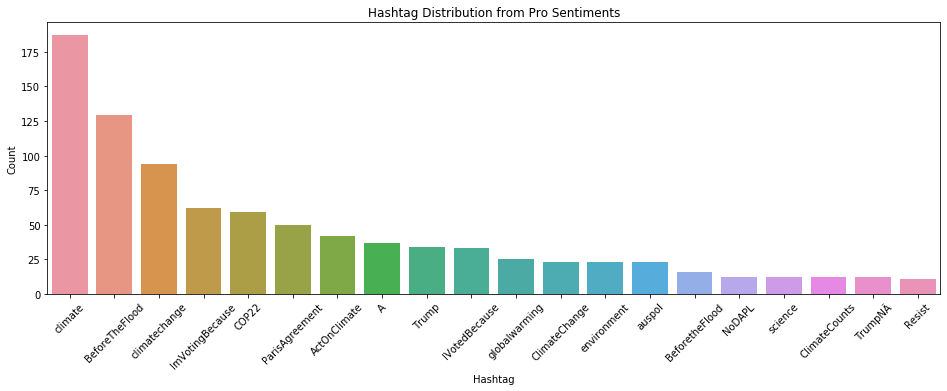

In [44]:
a = nltk.FreqDist(HT_Pro)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Hashtag Distribution from Pro Sentiments')
plt.xticks(rotation=45)
plt.show()

From the Pro Sentiments Hashtag Distribution, 'Climate', 'beforetheflood', 'climatechange' and 'ImVotingBecause' are the most frequent.

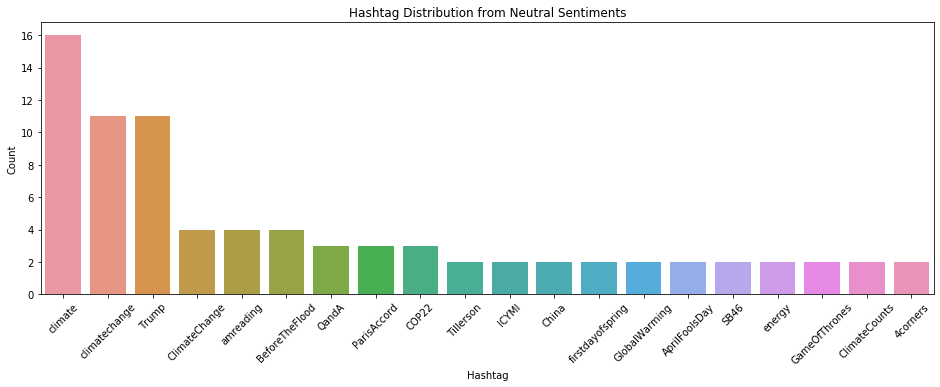

In [45]:
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Hashtag Distribution from Neutral Sentiments')
plt.xticks(rotation=45)
plt.show()

From the Neutral Sentiments Hashtag Distribution, 'Climate', 'climatechange' and 'Trump' are the most frequent.

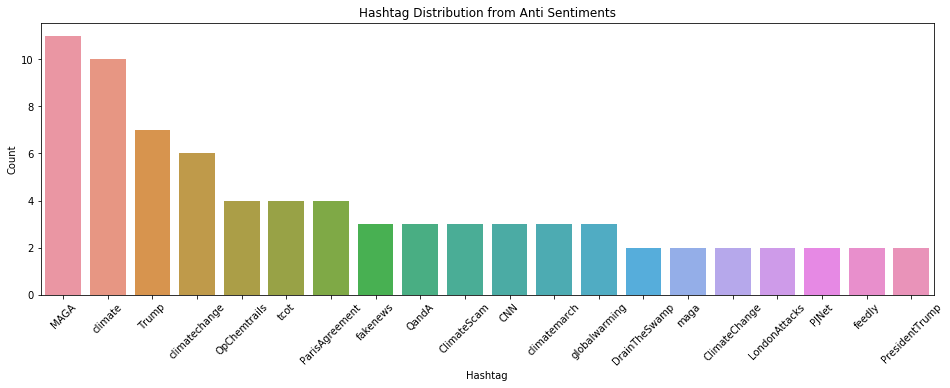

In [46]:
a = nltk.FreqDist(HT_Anti)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Hashtag Distribution from Anti Sentiments')
plt.xticks(rotation=45)
plt.show()

In [ ]:
From the Anti Sentiments Hashtag Distribution,'MAGA' 'Climate', 'Trump' and 'climatechange' are the most frequent.

#### Observations
###### 'Climate' and 'Climatechange' are the most talked about topics in the USA at that time.

###### With 'Trump', 'ImVotingBecause' and 'MAGA'(which stands for Make America Great Again) also in the top 4 most talked about topics helps us reduce the time period to 2019-2020, around the time when last elections were held in the USA.

The EDA, was to give us a better understanding of the data and help us set the next course of action which is Feature engineering.
Next, we move on to the Feature engineering section which is essential because though we have a general understanding of the data, we have seen that the data need to be processed and cleaned, with words like 'https','co','RT', appearing alot on the Wordcloud analysis though they are noise, to enable us gather accurate insights and model the data with precision. 

<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features. The presence of irrelevant characteristics in your Data can reduce the Model accuracy and cause your Model to train based on irrelevant features. In other words, if the features are strong enough, the Machine Learning Algorithm will give fantastic outcomes.

Feature engineering helps to glean better insights, for example with Wordcloud and Hashtag Analysis with the removal of words like 'https' which is noise, would not appear as an important word in all the sentiments analysis.

Feature Engineering is a journey, with some of the steps listed here:
    -Cleaning the data which entails removing URLS, word capitalization, punctuations, Non Ascii and Stopwords removal
    -Feature Selection which entails creating new features and dropping irrelevant ones if necessary
    -Handling missing values if there are any
    -Handling imbalanced data which helps in removing biases in the model
    -Handling outliers if there are any
    -Encoding the features or label to help train the model better, by transforming features and labels to the integer datatype.
    -Feature Scaling helps to train the model better as it puts the all the different features on the same scale hence we can analyse the relationships better, by reducing the variance effect

Walk with us as we learn and model the data, with each step getting us closer to our goal of efficiently predicting with precision our data.

### Here, we will clean up our train and test data, and get them ready for model building and testing

We First remove noise gathered while scrapping the data from the web, words like 'htttps' that seem important because of how frequent they are and yet are irrelevant to the model.

In [47]:
## Remove urls
print ('Removing URLs...')
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-link'
train['clean'] = train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

## Remove urls test

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-link'
test['clean'] = test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

Removing URLs...


Then we lowercase our data so that words like 'ClimateChange' and 'climatechange' are not counted as different in our model.

In [48]:
# Make lower case

train['clean'] = train['clean'].str.lower()
test['clean'] = test['clean'].str.lower()

Then we remove puntuation, so that Sentiments are gotten from actual and relevant words or tokens.

In [49]:
#Punctuations removal:

def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
train['clean'] = train['clean'].apply(remove_punctuation_numbers)
test['clean'] = test['clean'].apply(remove_punctuation_numbers)

In [50]:
#Removed NonAscii

def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

train['clean'] = train['clean'].apply(_removeNonAscii)
test['clean'] = test['clean'].apply(_removeNonAscii)

Stemming helps our model by removing words that appear in many formats but still represent the base word, helps us to get a clean representation of relevant words. 

In [51]:
# Clean the word using stemming
stema = PorterStemmer()
train['clean'] = [stema.stem(word) for word in train['clean']]
test['clean'] = [stema.stem(word) for word in test['clean']]


Stopwords are removed because they are frequent but are not relevant to the topic at hand, and can lead to inaccurate insights

In [52]:
#Stopword removal:

train['clean'] = [word for word in train['clean'] if word not in ENGLISH_STOP_WORDS]
test['clean'] = [word for word in test['clean'] if word not in ENGLISH_STOP_WORDS]


We now take a look at how our data looks like after the cleaning process is complete

In [53]:
train.head()

,sentiment,message,tweetid,clean
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...
2,2,RT @RawStory: Researchers say we have three ye...,698562,rt rawstory researchers say we have three year...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,todayinmaker wired was a pivotal year in the...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,rt soynoviodetodas its and a racist sexist cl...


We head on over to Feature selection, and we start with creation of new relevant features...

We start by creating a 'new_len' feature that gives us the number of elements(total number of characters) in the new column 'clean'

In [54]:
#Adding length of cleaned tweet to dataset
train['new_len']= train['clean'].apply(lambda x:len(x))
test['new_len']= test['clean'].apply(lambda x:len(x))
train.head()

,sentiment,message,tweetid,clean,new_len
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...,113
1,1,It's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...,58
2,2,RT @RawStory: Researchers say we have three ye...,698562,rt rawstory researchers say we have three year...,108
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,todayinmaker wired was a pivotal year in the...,76
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,rt soynoviodetodas its and a racist sexist cl...,110


Then we create a new 'word_count' column that gives the number of words per 'clean' column

In [55]:
# Function that returns number of words in a string
def count_words(string):
# Split the string into words
    words = string.split()    
    # Return the number of words
    return len(words)
# Create a new feature word_count
train['word_count'] = train['clean'].apply(count_words)
test['word_count'] = test['clean'].apply(count_words)

Then we create a new 'hashtag_count' column that gives the number of hashtags found in the 'message' column

In [56]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
train['hashtag_count'] = train['message'].apply(count_hashtags)
test['hashtag_count'] = test['message'].apply(count_hashtags)

Then we create a new 'stop_count' column that gives the number of stopwords found in the column 'message' per row

In [57]:
# Function that returns number of stopwords in a string
def count_stopwords(string):
	# Split the string into words
    words = string.split()    
    # Create a list of words that are stopwords
    stop_w = [word for word in words if word in ENGLISH_STOP_WORDS]    
    # Return number of stopwords
    return(len(stop_w))

# Create a feature hashtag_count and display distribution
train['stop_count'] = train['message'].apply(count_stopwords)
test['stop_count'] = test['message'].apply(count_stopwords)

Then we create a new 'count_mention' column that gives the number of mentions found in the column 'message' per row

In [58]:
# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]    
    # Return number of hashtags
    return(len(mentions))
# Create a feature hashtag_count and display distribution
train['mention_count'] = train['message'].apply(count_mentions)
test['mention_count'] = test['message'].apply(count_mentions)

This step we combine a bunch of steps. These include creating the following columns:
    -'qnt_unique_words' that gives the number of unique words found in the 'clean' column per row
    -'qnt_chars' that gives the number of characters found in the 'message' column per row
    -'qnt_punctuation' this first replaces the punctuations found and gives the count of the puntuations replaced in the 'message' column per row
    -'qnt_urls' that gives the number of urls found in the 'message' column per row 
    -'mean-chars_words' that gives the mean of the count of characters in words found in the 'message' column per row

In [59]:
re_url = r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'

train['qnt_unique_words'] = train['clean'].str.split().apply(lambda x : len(set(x)))
train['qnt_chars'] = train['message'].str.len()
train['qnt_punctuation'] = train['message'].str.replace(r'[\w\s#]+', '').apply(lambda x : len(x))
train['qnt_urls'] = train['message'].str.findall(re_url).apply(lambda x : len(x))
train['mean_chars_words'] = train['message'].str.split().apply(lambda x: np.mean([len(w) for w in x]))

Now, we look at how our Train data looks like...

In [60]:
train.head(3)

,sentiment,message,tweetid,clean,new_len,word_count,hashtag_count,stop_count,mention_count,qnt_unique_words,qnt_chars,qnt_punctuation,qnt_urls,mean_chars_words
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...,113,19,0,3,1,19,140,12,1,6.421053
1,1,It's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...,58,10,0,3,0,10,62,1,0,5.300000
2,2,RT @RawStory: Researchers say we have three ye...,698562,rt rawstory researchers say we have three year...,108,19,0,7,1,18,140,14,2,6.421053


We carry out the same steps to our Test data

In [61]:
test['qnt_unique_words'] = test['clean'].str.split().apply(lambda x : len(set(x)))
test['qnt_chars'] = test['message'].str.len()
test['qnt_punctuation'] = test['message'].str.replace(r'[\w\s#]+', '').apply(lambda x : len(x))
test['qnt_urls'] = test['message'].str.findall(re_url).apply(lambda x : len(x))
test['mean_chars_words'] = test['message'].str.split().apply(lambda x: np.mean([len(w) for w in x]))

We look at how our Test and train Data is shaping up...

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 13 columns):
message             10546 non-null object
tweetid             10546 non-null int64
clean               10546 non-null object
new_len             10546 non-null int64
word_count          10546 non-null int64
hashtag_count       10546 non-null int64
stop_count          10546 non-null int64
mention_count       10546 non-null int64
qnt_unique_words    10546 non-null int64
qnt_chars           10546 non-null int64
qnt_punctuation     10546 non-null int64
qnt_urls            10546 non-null int64
mean_chars_words    10546 non-null float64
dtypes: float64(1), int64(10), object(2)
memory usage: 1.0+ MB


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 14 columns):
sentiment           15819 non-null int64
message             15819 non-null object
tweetid             15819 non-null int64
clean               15819 non-null object
new_len             15819 non-null int64
word_count          15819 non-null int64
hashtag_count       15819 non-null int64
stop_count          15819 non-null int64
mention_count       15819 non-null int64
qnt_unique_words    15819 non-null int64
qnt_chars           15819 non-null int64
qnt_punctuation     15819 non-null int64
qnt_urls            15819 non-null int64
mean_chars_words    15819 non-null float64
dtypes: float64(1), int64(11), object(2)
memory usage: 1.7+ MB


#### We regenerate our WordClouds on our different Sentiments and capture the difference 

We start with the Neutral Sentiments

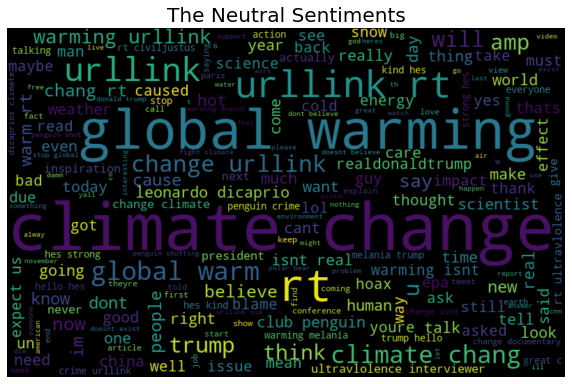

In [65]:
neutral_words =' '.join([text for text in train['clean'][train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Sentiments', fontsize = 20)
plt.show()

Now we see that 'https' is no longer a word, but 'Climate', 'change', 'global', 'warming' and 'rt' are still key words.
'rt' is a relevant stop word in politics which means Right Honourable

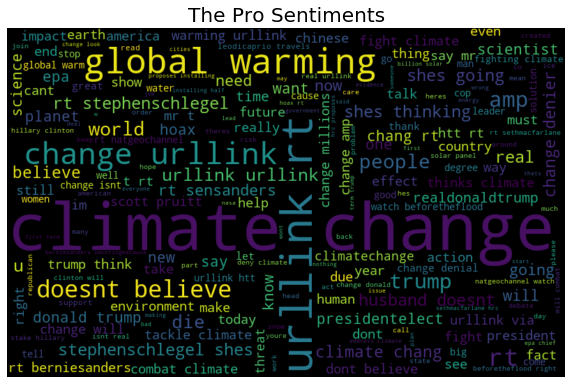

In [66]:
# Then we do the same for Pro Sentiment
pro_words =' '.join([text for text in train['clean'][train['sentiment'] == 1]])

wordcloud = WordCloud( width=800, height=500, random_state = 0, max_font_size = 110).generate(pro_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Pro Sentiments', fontsize = 20)
plt.show()

Again we see words like 'climate', 'change' 'global', 'warming' are key and the 'https' word has disappeared.

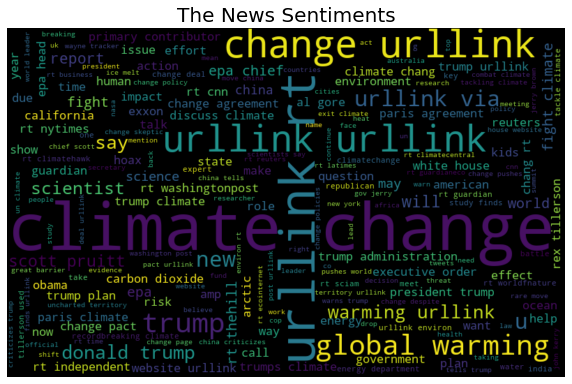

In [67]:
# Then we do the same for News Sentiment
news_words =' '.join([text for text in train['clean'][train['sentiment'] == 2]])

wordcloud = WordCloud( width=800, height=500, random_state = 0, max_font_size = 110).generate(news_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The News Sentiments', fontsize = 20)
plt.show()

Again we see words like 'climate', 'change' 'global', 'warming' are key and the 'https' word has disappeared.

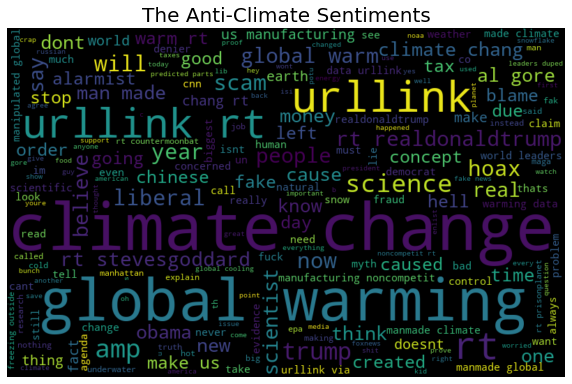

In [69]:
#Finally, we do the same for Anti Sentiment
anti_words =' '.join([text for text in train['clean'][train['sentiment'] == -1]])

wordcloud = WordCloud( width=800, height=500, random_state = 0, max_font_size = 110).generate(anti_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Anti-Climate Sentiments', fontsize = 20)
plt.show()

Again we see words like 'climate', 'change' 'global', 'warming' are key and the 'https' word has disappeared, and been replaced with 'Urllink'word.

With Feature Engineering complete, we are on way to getting better, accurate insights and developing a model that is precise.

It's only after Feature Engineering do we realize that the 'rt' is an important stopword in politics and hence should not be removed, though we initially thought of it otherwise.

Feature engineering has created relevant features that would help us better model the data.

Next we move on to Modelling, which is main processs, to be able to predict text to various sentiments. 

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Data Modelling is the incorporation Machine Learning Algorithms to the data.

This is one of the most crucial processes in Data Science Modelling as the Machine Learning Algorithm aids in creating a usable Data Model. There are a lot of algorithms to pick from, the Model selected is based on the problem at hand, that is the prediction of the sentiment given a text.



In [40]:
#Splitting you Data for X and Y
train1 = train.copy()
X = train1['clean']
y = train1['sentiment']

In [41]:
# creating bag of words

vectorizer = CountVectorizer(ngram_range=(1,2), min_df=2)
# fit the model for training data
X = vectorizer.fit_transform(X)

print(X.shape)
print(y.shape)

(15819, 33271)
(15819,)


In [42]:
# creating bag of words for test data
x_test = test['clean']
x_t =vectorizer.transform(x_test)


print(x_t.shape)

(10546, 33271)


In [43]:
#Split the X data into train and valid 

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)

#### Let's build some classification models!

In [44]:
names = ['Logistic Regression', 'Multinomial NaiveB',          
         'BaggingClassifier', 'Random Forest']

In [45]:
classifiers = [
    LogisticRegression(), 
    MultinomialNB(),
    BaggingClassifier(base_estimator = LogisticRegression()),
    RandomForestClassifier() 
]

In [46]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(x_train)   
    y_pred_test = clf.predict(x_valid)
    
    print ('... scoring')
    accuracy  = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred,average="macro")
    recall    = recall_score(y_train, y_pred,average="macro")
    
    f1        = f1_score(y_train, y_pred,average="macro")    
    f1_test   = f1_score(y_valid, y_pred_test,average="macro")    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = confusion_matrix(y_train, y_pred)
    class_report[name] = classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

... predicting
... scoring
Fitting Multinomial NaiveB model...
... predicting
... scoring
Fitting BaggingClassifier model...


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
... All done!


- Before speaking of downsampling/ upsampling, etc, introduce what the concept is and what it entails. Make use of markdowns to get your message across.

#### BUILDING MODELS WITH DOWNSAMPLED DATA

In [58]:
# Separate the classes classes
train2 = train.copy()
neutral = train2[train2['sentiment']==0]
pro = train2[train2['sentiment']==1]
news = train2[train2['sentiment']==2]
anti = train2[train2['sentiment']== -1]

base = 1500

In [59]:
# Downsample SENTIMENTS
neutral_sampled2 = resample(neutral,
                          replace=False, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27) # reproducible results

pro_sampled2 = resample(pro,
                          replace=False, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27) # reproducible results

news_sampled2 = resample(news,
                          replace=False, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27)

anti_sampled2 = resample(anti,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27)

In [60]:
# Combine downsampled classes
train2 = pd.concat([neutral_sampled2, pro_sampled2,news_sampled2,anti_sampled2])

train2['sentiment'].value_counts()

 0    1500
 1    1500
 2    1500
-1    1500
Name: sentiment, dtype: int64

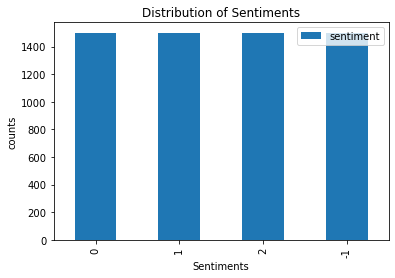

In [61]:
#Lets take a look at the breakdown of sentiments (target variable)

pd.value_counts(train2['sentiment']).plot.bar()
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('counts')
plt.legend()
plt.show()

### Lets build new models with the resampled data

In [62]:
#Splitting you Data for X and Y
X2 = train2['clean']
y2 = train2['sentiment']

In [63]:
# creating bag of words

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
# fit the model for training data
X2= vectorizer.fit_transform(X2)

print(X2.shape)
print(y2.shape)

(6000, 16708)
(6000,)


In [64]:
# creating bag of words for test data
x_test = test['clean']
x_t =vectorizer.transform(x_test)


print(x_t.shape)

(10546, 16708)


In [65]:
#Split the X data into train and valid 

x_train2, x_valid2, y_train2, y_valid2 = train_test_split(X2, y2, test_size = 0.20, random_state = 42)

In [66]:
names2 = ['Logistic Regression', 'Multinomial NaiveB',          
         'BaggingClassifier', 'Random Forest']

In [67]:
classifiers2 = [
    LogisticRegression(), 
    MultinomialNB(),
    BaggingClassifier(base_estimator = LogisticRegression()),
    RandomForestClassifier(),    
    XGBClassifier()
]

In [68]:
results_2 = []

models_2 = {}
confusion_2 = {}
class_report_2 = {}


for name2, clf2 in zip(names2, classifiers2):    
    print ('Fitting {:s} model...'.format(name2))
    run_time2 = %timeit -q -o clf2.fit(x_train2, y_train2)
    
    print ('... predicting')
    y_pred2 = clf2.predict(x_train2)   
    y_pred_test2 = clf2.predict(x_valid2)
    
    print ('... scoring')
    accuracy2  = accuracy_score(y_train2, y_pred2)
    precision2 = precision_score(y_train2, y_pred2,average="macro")
    recall2    = recall_score(y_train2, y_pred2,average="macro")
    
    f12        = f1_score(y_train2, y_pred2,average="macro")    
    f1_test2   = f1_score(y_valid2, y_pred_test2,average="macro")    
    
    # Save the results to dictionaries
    models_2[name2] = clf2    
    confusion_2[name2] = confusion_matrix(y_train2, y_pred2)
    class_report_2[name2] = classification_report(y_train2, y_pred2)
    
    results_2.append([name2, accuracy2, precision2, recall2, f12, f1_test2, run_time2.best])

    
results_2 = pd.DataFrame(results_2, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results_2.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Multinomial NaiveB model...
... predicting
... scoring
Fitting BaggingClassifier model...


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
... All done!


#### BUILDING MODELS WITH UPSAMPLED DATA

In [69]:
# Separate the classes classes
train3 = train.copy()
neutral = train3[train3['sentiment']==0]
pro = train3[train3['sentiment']==1]
news = train3[train3['sentiment']==2]
anti = train3[train3['sentiment']== -1]

base = 5000

In [70]:
# UPSAMPLE SENTIMENTS
neutral_sampled3 = resample(neutral,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27) # reproducible results

pro_sampled3 = resample(pro,
                          replace=False, # sample with replacement (we dont need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27) # reproducible results

news_sampled3 = resample(news,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27)

anti_sampled3 = resample(anti,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= base, # match number in minority class
                          random_state=27)

In [71]:
# Combine downsampled classes
train3 = pd.concat([neutral_sampled3, pro_sampled3,news_sampled3,anti_sampled3])

train3['sentiment'].value_counts()

 0    5000
 1    5000
 2    5000
-1    5000
Name: sentiment, dtype: int64

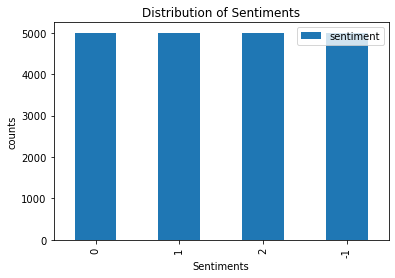

In [72]:
#Lets take a look at the breakdown of sentiments (target variable)

pd.value_counts(train3['sentiment']).plot.bar()
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('counts')
plt.legend()
plt.show()

#### Let's build models with our upsampled data

In [73]:
#Splitting you Data for X and Y
X3 = train3['clean']
y3 = train3['sentiment']

In [74]:
# creating bag of words

vectorizer3 = TfidfVectorizer(ngram_range=(1,2), min_df=2)
# fit the model for training data
X3 = vectorizer3.fit_transform(X3)

print(X3.shape)
print(y3.shape)

(20000, 52959)
(20000,)


In [75]:
# creating bag of words for test data
x_test = test['clean']
x_t =vectorizer3.transform(x_test)


print(x_t.shape)

(10546, 52959)


In [76]:
#Split the X data into train and valid 

x_train3, x_valid3, y_train3, y_valid3 = train_test_split(X3, y3, test_size = 0.20, random_state = 42)

In [77]:
names3 = ['Logistic Regression', 'Multinomial NaiveB',          
         'BaggingClassifier', 'Random Forest']

In [78]:
classifiers3 = [
    LogisticRegression(), 
    MultinomialNB(),
    BaggingClassifier(base_estimator = LogisticRegression()),
    RandomForestClassifier()
]

In [79]:
results_3 = []

models_3 = {}
confusion_3 = {}
class_report_3 = {}


for name3, clf3 in zip(names3, classifiers3):    
    print ('Fitting {:s} model...'.format(name3))
    run_time3 = %timeit -q -o clf3.fit(x_train3, y_train3)
    
    print ('... predicting')
    y_pred3 = clf3.predict(x_train3)   
    y_pred_test3 = clf3.predict(x_valid3)
    
    print ('... scoring')
    accuracy3  = accuracy_score(y_train3, y_pred3)
    precision3 = precision_score(y_train3, y_pred3,average="macro")
    recall3    = recall_score(y_train3, y_pred3,average="macro")
    
    f13        = f1_score(y_train3, y_pred3,average="macro")    
    f1_test3   = f1_score(y_valid3, y_pred_test3,average="macro")    
    
    # Save the results to dictionaries
    models_3[name3] = clf3    
    confusion_3[name3] = confusion_matrix(y_train3, y_pred3)
    class_report_3[name3] = classification_report(y_train3, y_pred3)
    
    results_3.append([name3, accuracy3, precision3, recall3, f13, f1_test3, run_time3.best])

    
results_3 = pd.DataFrame(results_3, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results_3.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

... predicting
... scoring
Fitting Multinomial NaiveB model...
... predicting
... scoring
Fitting BaggingClassifier model...


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
... All done!


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

For our model performance we will consider the following metrics - Accuracy, Precision, Recall and F1-score

### ACCURACY
This is simply the proportion of correct prediction to the total prediction. 

         Accuracy =  Correct predictions / Total predictions

### PRECISION
Precision answers the question of “what proportion of predicted positives in a class are truly postitive in that class? 

         Precision =  TP / TP + FP

### RECALL
When the outcome is actually yes, how often do we predict it as such?

         Precision =  TP / TP + FN

### F1-SCORE

It is calculated by taking the harmonic mean of precision and recall and ranges from 0 to 1. It is a more robust measure especiall for imbalanced data.

#### Lets see how the general Imbalanced data performed

In [80]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Random Forest,0.998973,0.998695,0.998382,0.998538,0.586721,175.340901
Logistic Regression,0.993915,0.993700,0.990766,0.992209,0.686394,8.491988
BaggingClassifier,0.962782,0.968145,0.939193,0.952757,0.683267,58.302359
Multinomial NaiveB,0.870802,0.878200,0.827414,0.845848,0.649229,0.058277


<AxesSubplot:xlabel='Classifier'>

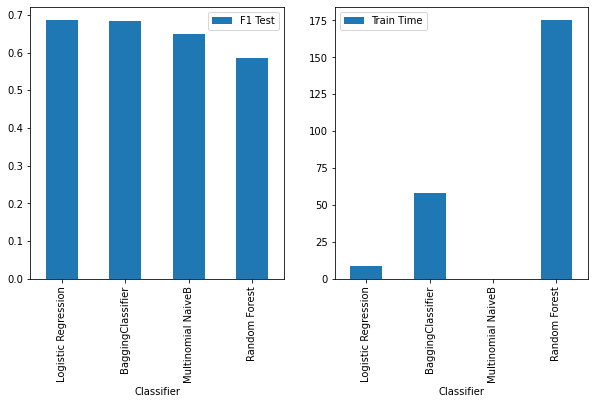

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Test', ascending=False, inplace=True)
results.plot(y='F1 Test', kind='bar', ax=ax[0], xlim=[0,1.1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

From the Graph above, 
- Our F1-score ranges between 0.5 - 0.6 across the 4 models, despite the high value across other metrics.
- Random Forest took the most train time and NaiveBayes the least.

### Let us see how our down-sampled data performed

In [82]:
results_2.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Random Forest,0.999583,0.999586,0.999573,0.999579,0.698332,19.020515
Logistic Regression,0.921458,0.922537,0.921267,0.921329,0.730241,2.172595
Multinomial NaiveB,0.906875,0.909213,0.906500,0.906985,0.724774,0.007987
BaggingClassifier,0.898333,0.899788,0.898011,0.897855,0.712166,22.098265


<AxesSubplot:xlabel='Classifier'>

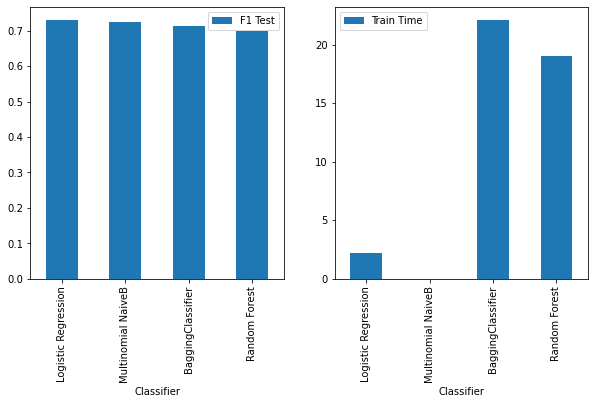

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results_2.sort_values('F1 Test', ascending=False, inplace=True)
results_2.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1])
results_2.plot(y='Train Time', kind='bar', ax=ax[1])

From the Graph above, 
- Our F1-score ranges between 0.6 - 0.7 across the 4 models for unseen data, this is a significant improvement from the previous performance
- BaggingClassifier took the most train time and NaiveBayes the least.

### Let us see how our Up-sampled data performed

In [85]:
results_3.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Random Forest,0.999313,0.999313,0.999313,0.999313,0.911292,176.728397
Logistic Regression,0.960250,0.960330,0.960157,0.960066,0.895766,9.100803
BaggingClassifier,0.949063,0.949263,0.948940,0.948748,0.884822,96.289864
Multinomial NaiveB,0.939750,0.941468,0.939706,0.939813,0.873884,0.047985


<AxesSubplot:xlabel='Classifier'>

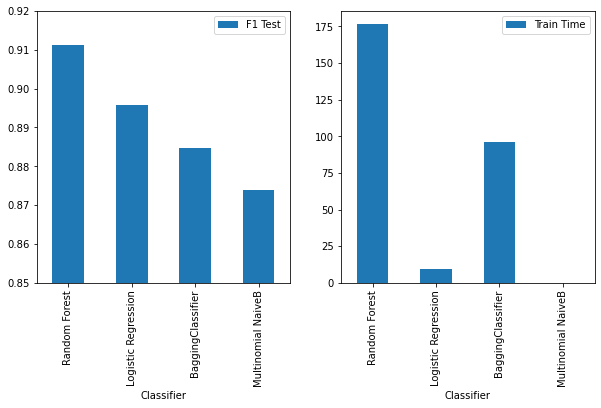

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results_3.sort_values('F1 Train', ascending=False, inplace=True)
results_3.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,0.92])
results_3.plot(y='Train Time', kind='bar', ax=ax[1])

From the Graph above, 
- Our F1-score ranges between 0.7 - 0.9 across the 4 models for unseen data, this is a significant improvement from the previous performance
- RandomForest took the most train time and NaiveBayes the least.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- For each model used, please give an in-depth explanation of what it is and how it works.

### Prepare Kaggle submission data from the models

In [90]:
rf = RandomForestClassifier()

In [95]:
lgr = LogisticRegression(C=10)
m_nb = MultinomialNB()
bgc = BaggingClassifier(lgr)

In [96]:
bgc.fit(X3,y3)
m_nb.fit(X3,y3)
lgr.fit(X3,y3)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(C=10)

In [92]:
rf.fit(X3,y3)

RandomForestClassifier()

In [93]:
rf1_pred = rf.predict(x_t)

In [ ]:
lg1_pred = lgr.predict(x_t)
m_nb_pred = m_nb.predict(x_t)
bgc_1 = bgc.predict(x_t)

In [94]:
sub_file1 = samplesubmission.copy()

sub_file1.sentiment = rf1_pred
sub_file1.to_csv("rf_00.csv", index = False)

In [ ]:
# # Create a submission file xgb
sub_file1 = samplesubmission.copy()

sub_file1.sentiment = rf1_pred
sub_file1.to_csv("rf_00.csv", index = False)

sub_file2 = samplesubmission.copy()

sub_file2.sentiment = lg1_pred
sub_file2.to_csv("lg_66.csv", index = False)

sub_file5 = samplesubmission.copy()

sub_file5.sentiment = bgc_1
sub_file5.to_csv("bgc_55.csv", index = False)

sub_file4 = samplesubmission.copy()

sub_file4.sentiment = m_nb_pred
sub_file4.to_csv("nb_55.csv", index = False)

### Let us create pickle files of our various models for deployment

In [97]:
# Pickle random forest model for use within our API  
import pickle 

save_path = 'twitter_simple_rf_model.pkl'
print (f"Training completed. Saving model to: {save_path}")
pickle.dump(rf, open(save_path,'wb'))

save_path = 'twitter_simple_lg_model_2.pkl'
print (f"Training completed. Saving model to: {save_path}")
pickle.dump(lgr, open(save_path,'wb'))

save_path = 'twitter_simple_naive_bayes_model_2.pkl'
print (f"Training completed. Saving model to: {save_path}")
pickle.dump(m_nb, open(save_path,'wb'))

save_path = 'twitter_simple_bag_model_2.pkl'
print (f"Training completed. Saving model to: {save_path}")
pickle.dump(bgc, open(save_path,'wb'))


Training completed. Saving model to: twitter_simple_rf_model.pkl
Training completed. Saving model to: twitter_simple_lg_model_2.pkl
Training completed. Saving model to: twitter_simple_naive_bayes_model_2.pkl
Training completed. Saving model to: twitter_simple_bag_model_2.pkl


- Conclusion?
- In this notebook, we explored the twitter climate change dataset....X amount of models where used namely....
- Give a summary of what you observed (insights)
- What did you note? Did you perform hyperparameter tuning and what did this give?
- What was the highest f1 score and which model was it obtained from?
- Future work and limitations encountered.
- Overall great work thus far!

In [89]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/beebeefaith/v5-classification-predict-team-4/327537ff41424615b8644adbf1d8a36c
COMET INFO:   Parameters:
COMET INFO:     C                                 : 1.0
COMET INFO:     alpha                             : 1.0
COMET INFO:     base_estimator                    : LogisticRegression()
COMET INFO:     base_estimator__C                 : 1.0
COMET INFO:     base_estimator__class_weight      : 1
COMET INFO:     base_estimator__dual              : False
COMET INFO:     base_estimator__fit_intercept     : True
COMET INFO:     base_estimator__intercept_scaling : 1
COMET INFO:     base_estimator__l1_ratio          : 1
COMET INFO:     base_estimator__max_iter          : 100
COMET INFO:     base_estimator__multi_class       : auto
COMET INFO:     base_e